In [1]:
!pip install tensorflow

In [2]:
from tensorflow.keras.models import Sequential #used to build a neural network
from tensorflow.keras.layers import Dense #used to build a neural network
from tensorflow.keras.datasets import mnist #loads MNIST handwritten digit dataset
from tensorflow.keras.utils import to_categorical #covert labels (0-9) into one-hot encoding
from PIL import Image, ImageOps #used to load and process handwritten digit images
import numpy as np

C:\Users\akash\anaconda3\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [3]:
#one-hot encoding[0 1 2 3 4 5 6 7 8 9]-->[0 0 0 1 0 0 0 0 0 0] ==3

In [4]:
#1. load MNIST dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [5]:
#2, flatten images (28x28 -> 784)
x_train = x_train.reshape(-1, 784).astype("float32") / 255.0
x_test = x_test.reshape(-1, 784).astype("float32") / 255.0

In [6]:
#3 . one-hot encode labels
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [7]:
#4. Build model
model = Sequential([
    Dense(256, activation="relu",input_shape=(784,)),
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dense(10, activation="softmax")
])

C:\Users\akash\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
#5.compile
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [9]:
#6 train
model.fit(x_train, y_train, epochs=10, batch_size=128,validation_split=0.1)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9136 - loss: 0.2937 - val_accuracy: 0.9647 - val_loss: 0.1175
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9677 - loss: 0.1073 - val_accuracy: 0.9732 - val_loss: 0.0822
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9786 - loss: 0.0698 - val_accuracy: 0.9740 - val_loss: 0.0821
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.9838 - loss: 0.0518 - val_accuracy: 0.9772 - val_loss: 0.0825
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9882 - loss: 0.0370 - val_accuracy: 0.9773 - val_loss: 0.0729
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9906 - loss: 0.0294 - val_accuracy: 0.9763 - val_loss: 0.0862
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9915 - loss: 0.0264 - val_accuracy: 0.9788 - val_loss: 0.0799
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9934 - loss: 0.0196 - val_

In [10]:
#7.evaluate
loss,acc = model.evaluate(x_test, y_test)
print("Test accuracy:",acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9800 - loss: 0.0863
Test accuracy: 0.9800000190734863


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step   


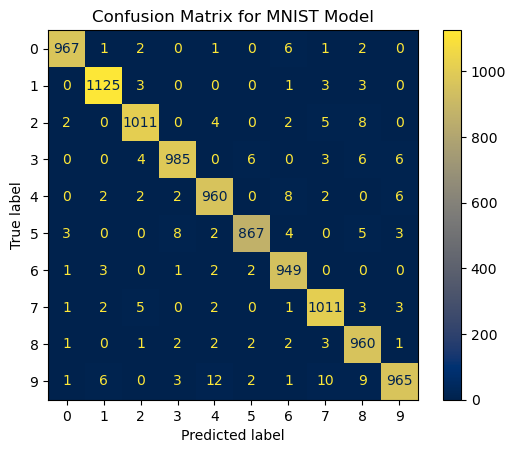

In [11]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#predict on tesst set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

#compute confusion matrix
cm  = confusion_matrix(y_true, y_pred_classes)

#plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(10)))
disp.plot(cmap="cividis", values_format="d")
plt.title("Confusion Matrix for MNIST Model")
plt.show()

In [14]:
def preprocess_digit_image_for_ann(path,invert=True, threshold=True):
    """
    Preprocess an external digit image for ANN (MLP).
    """
    img = Image.open(path).convert("L")  # Convert to grayscale

    if invert:
        img = ImageOps.invert(img)  # Ensure digit is white on black

    # Resize to 20x20, then pad to 28x28
    img.thumbnail((20, 20), Image.LANCZOS)
    new_img = Image.new("L", (28, 28), (0))
    left = (28 - img.size[0]) // 2
    top = (28 - img.size[1]) // 2
    new_img.paste(img, (left, top))

    arr = np.array(new_img).astype("float32") / 255.0

    if threshold:
        arr = (arr > 0.5).astype(float)

    arr = arr.reshape(1, 784)  # Flatten for ANN
    return arr, new_img

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


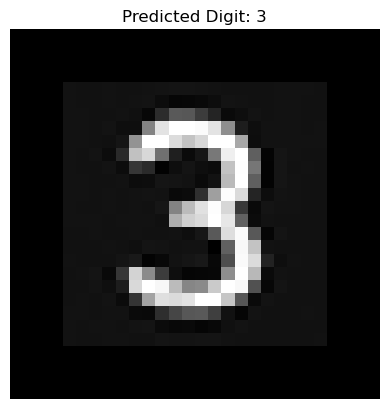

In [20]:
# -------- Prediction + Visualization --------
image_path ="3.png"            # <-- change to your image file
arr, processed_img = preprocess_digit_image_for_ann(image_path, invert=True, threshold=True)

pred = model.predict(arr)
pred_digit = np.argmax(pred)

# Show processed image with prediction
plt.imshow(processed_img, cmap="gray")
plt.title(f"Predicted Digit: {pred_digit}")
plt.axis("off")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


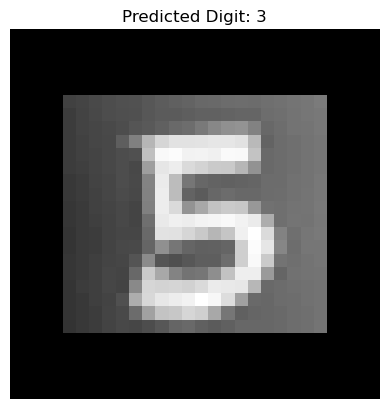

In [21]:
def preprocess_digit_image_for_ann(path, invert=True, threshold=True):
    """
    Preprocess an external digit image for ANN (MLP).
    """
    img = Image.open(path).convert("L")  # Convert to grayscale

    if invert:
        img = ImageOps.invert(img)  # Ensure digit is white on black

    # Resize to 20x20, then pad to 28x28
    img.thumbnail((20, 20), Image.LANCZOS)
    new_img = Image.new("L", (28, 28), (0))
    left = (28 - img.size[0]) // 2
    top = (28 - img.size[1]) // 2
    new_img.paste(img, (left, top))

    arr = np.array(new_img).astype("float32") / 255.0

    if threshold:
        arr = (arr > 0.5).astype(float)

    arr = arr.reshape(1, 784)  # Flatten for ANN
    return arr, new_img
    # -------- Prediction + Visualization --------
image_path = "5.jpeg"   # <-- change to your image file
arr, processed_img = preprocess_digit_image_for_ann(image_path, invert=True, threshold=True)

pred = model.predict(arr)
pred_digit = np.argmax(pred)

# Show processed image with prediction
plt.imshow(processed_img, cmap="gray")
plt.title(f"Predicted Digit: {pred_digit}")
plt.axis("off")
plt.show()